# Loop unrolling

De la wikipedia:

> El Desenroscado de bucles (conocido en inglés como loop unrolling o Loop unwinding) es una técnica de optimización de bucles que intenta mejorar la velocidad de ejecución de un programa a costa de aumentar su tamaño binario (Situación de compromiso espacio-tiempo). Esta transformación puede hacerla manualmente el programador o un Compilador optimizador.

En estos apuntes se hará un ejemplo manual de esto con el producto matriz-vector en C asumiendo que los datos están ordenados por filas. 

## Limpiar archivos

In [1]:
%%bash
if rm *.o *.c *.so; then
    echo 'LIMPIO'
else
    echo 'NO HABÍA ARCHIVOS QUE LIMPIAR'
fi

LIMPIO


## Dependencias

In [2]:
import numpy
import ctypes
import time
from statistics import mean
from utilities import filtro_mediana
import matplotlib.pyplot as plt
from numpy import asarray

## Código C

In [3]:
%%file libmatveclu.c
void matvecclassic(double *A, double *x, double *b, int N)
{
    double tmp = 0.0;
    for(int i = 0; i < N; i++)
    {
        tmp = 0.0;
        for(int j = 0; j < N; j++)
        {
            tmp += A[i*N + j]*x[j];
        }
        b[i] = tmp;
    }   
}

void matvecloopunroll2(double *A, double *x, double *b, int N)
{
    double t0, t1;
    for(int i = 0; i < N; i+=2)
    {
        t0 = 0.0;
        t1 = 0.0;
        for(int j = 0; j < N; j++)
        {
            t0 += A[(i + 0)*N + j]*x[j];
            t1 += A[(i + 1)*N + j]*x[j];
        }
        b[i+0] = t0;
        b[i+1] = t1;
    }   
}

void matvecloopunroll4(double *A, double *x, double *b, int N)
{
    double t0, t1, t2, t3;
    for(int i = 0; i < N; i+=4)
    {
        t0 = 0.0;
        t1 = 0.0;
        t2 = 0.0;
        t3 = 0.0;
        for(int j = 0; j < N; j++)
        {
            t0 += A[(i + 0)*N + j]*x[j];
            t1 += A[(i + 1)*N + j]*x[j];
            t2 += A[(i + 2)*N + j]*x[j];
            t3 += A[(i + 3)*N + j]*x[j];
        }
        b[i+0] = t0;
        b[i+1] = t1;
        b[i+2] = t2;
        b[i+3] = t3;
    }   
}

void matvecloopunroll8(double *A, double *x, double *b, int N)
{
    double t0, t1, t2, t3, t4, t5, t6, t7;
    for(int i = 0; i < N; i+=8)
    {
        t0 = 0.0;
        t1 = 0.0;
        t2 = 0.0;
        t3 = 0.0;
        t4 = 0.0;
        t5 = 0.0;
        t6 = 0.0;
        t7 = 0.0;
        for(int j = 0; j < N; j++)
        {
            t0 += A[(i + 0)*N + j]*x[j];
            t1 += A[(i + 1)*N + j]*x[j];
            t2 += A[(i + 2)*N + j]*x[j];
            t3 += A[(i + 3)*N + j]*x[j];
            t4 += A[(i + 4)*N + j]*x[j];
            t5 += A[(i + 5)*N + j]*x[j];
            t6 += A[(i + 6)*N + j]*x[j];
            t7 += A[(i + 7)*N + j]*x[j];
        }
        b[i + 0] = t0;
        b[i + 1] = t1;
        b[i + 2] = t2;
        b[i + 3] = t3;
        b[i + 4] = t4;
        b[i + 5] = t5;
        b[i + 6] = t6;
        b[i + 7] = t7;
    }   
}

void matvecloopunroll16(double *A, double *x, double *b, int N)
{
    double t0, t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15;
    for(int i = 0; i < N; i+=16)
    {
        t0 = 0.0;
        t1 = 0.0;
        t2 = 0.0;
        t3 = 0.0;
        t4 = 0.0;
        t5 = 0.0;
        t6 = 0.0;
        t7 = 0.0;
        t8 = 0.0;
        t9 = 0.0;
        t10 = 0.0;
        t11 = 0.0;
        t12 = 0.0;
        t13 = 0.0;
        t14 = 0.0;
        t15 = 0.0;
        for(int j = 0; j < N; j++)
        {
            t0 += A[(i + 0)*N + j]*x[j];
            t1 += A[(i + 1)*N + j]*x[j];
            t2 += A[(i + 2)*N + j]*x[j];
            t3 += A[(i + 3)*N + j]*x[j];
            t4 += A[(i + 4)*N + j]*x[j];
            t5 += A[(i + 5)*N + j]*x[j];
            t6 += A[(i + 6)*N + j]*x[j];
            t7 += A[(i + 7)*N + j]*x[j];
            t8 += A[(i + 8)*N + j]*x[j];
            t9 += A[(i + 9)*N + j]*x[j];
            t10 += A[(i + 10)*N + j]*x[j];
            t11 += A[(i + 11)*N + j]*x[j];
            t12 += A[(i + 12)*N + j]*x[j];
            t13 += A[(i + 13)*N + j]*x[j];
            t14 += A[(i + 14)*N + j]*x[j];
            t15 += A[(i + 15)*N + j]*x[j];
        }
        b[i + 0] = t0;
        b[i + 1] = t1;
        b[i + 2] = t2;
        b[i + 3] = t3;
        b[i + 4] = t4;
        b[i + 5] = t5;
        b[i + 6] = t6;
        b[i + 7] = t7;
        b[i + 8] = t8;
        b[i + 9] = t9;
        b[i + 10] = t10;
        b[i + 11] = t11;
        b[i + 12] = t12;
        b[i + 13] = t13;
        b[i + 14] = t14;
        b[i + 15] = t15;
    }   
}

Writing libmatveclu.c


## Librería dinámica

In [4]:
! gcc -c libmatveclu.c -o libmatveclu.o
! gcc -shared libmatveclu.o -o libmatveclu.so

## Enlace con Python

In [5]:
def ctypes_libmatveclu():
    # ruta de la shared library
    libmatveclu = ctypes.CDLL('./libmatveclu.so')
    
    # tipo de los argumentos de la forma sin bloques
    libmatveclu.matvecclassic.argtypes = [
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        ctypes.c_int
    ]

    # tipo de los argumentos de la forma con loop unrolling
    libmatveclu.matvecloopunroll2.argtypes = [
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        ctypes.c_int
    ]

    # tipo de los argumentos de la forma con loop unrolling
    libmatveclu.matvecloopunroll4.argtypes = [
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        ctypes.c_int
    ]

    # tipo de los argumentos de la forma con loop unrolling
    libmatveclu.matvecloopunroll8.argtypes = [
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        ctypes.c_int
    ]

    # tipo de los argumentos de la forma con loop unrolling
    libmatveclu.matvecloopunroll16.argtypes = [
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        numpy.ctypeslib.ndpointer(dtype=numpy.double),
        ctypes.c_int
    ]
    
    # se devuelve las funciones configuradas
    return libmatveclu.matvecclassic, libmatveclu.matvecloopunroll2, libmatveclu.matvecloopunroll4, libmatveclu.matvecloopunroll8, libmatveclu.matvecloopunroll16

matvecclassic, matvecloopunroll2, matvecloopunroll4, matvecloopunroll8, matvecloopunroll16 = ctypes_libmatveclu()

## Error relativo

In [6]:
N = 1024
A = numpy.random.rand(N,N)
x = numpy.random.rand(N,1)
bclassic = numpy.zeros_like(x)
bl2 = numpy.zeros_like(x)
bl4 = numpy.zeros_like(x)
bl8 = numpy.zeros_like(x)
bl16 = numpy.zeros_like(x)
matvecclassic(A.flatten(), x, bclassic, N)
matvecloopunroll2(A.flatten(), x, bl2, N)
matvecloopunroll4(A.flatten(), x, bl4, N)
matvecloopunroll8(A.flatten(), x, bl8, N)
matvecloopunroll16(A.flatten(), x, bl16, N)
numpy.linalg.norm(A.dot(x)-bclassic), 
numpy.linalg.norm(A.dot(x)-bl2), 
numpy.linalg.norm(A.dot(x)-bl4), 
numpy.linalg.norm(A.dot(x)-bl8), 
numpy.linalg.norm(A.dot(x)-bl16)

(7.05299479980817e-12,
 7.05299479980817e-12,
 7.05299479980817e-12,
 7.05299479980817e-12,
 7.05299479980817e-12)

## Mediciones

In [7]:
ns = 2**numpy.arange(8,15)
veces = range(22)

ltlu2 = []
ltlu4 = []
ltlu8 = []
ltlu16 = []
lt = []
for n in ns:
    ltlu2i = []
    ltlu4i = []
    ltlu8i = []
    ltlu16i = []
    lti = []
    for _ in veces:
        # entradas
        A = numpy.random.rand(n,n)
        Y = A.flatten()
        x = numpy.random.rand(n,1)
        
        # para la forma sin lu
        bclassic = numpy.zeros_like(x)
        # para lu 2 
        b2 = numpy.zeros_like(x)
        # para lu 4 
        b4 = numpy.zeros_like(x)
        # para lu 8
        b8 = numpy.zeros_like(x)
        # para lu 16
        b16 = numpy.zeros_like(x)
        
        # 4
        tic = time.time()
        matvecloopunroll2(Y,x,b2,n)
        toc = time.time()
        ltlu2i.append(toc-tic)

        # 4
        tic = time.time()
        matvecloopunroll4(Y,x,b4,n)
        toc = time.time()
        ltlu4i.append(toc-tic)
        
        # 8
        tic = time.time()
        matvecloopunroll8(Y,x,b8,n)
        toc = time.time()
        ltlu8i.append(toc-tic)

        # 16
        tic = time.time()
        matvecloopunroll16(Y,x,b16,n)
        toc = time.time()
        ltlu16i.append(toc-tic)
        
        # sin lu
        tic = time.time()
        matvecclassic(Y,x,bclassic,n)
        toc = time.time()
        lti.append(toc-tic)

        del A
        del Y
        del x
        del bclassic
        del b2
        del b4
        del b8
        del b16
    
    ltlu2.append(mean(filtro_mediana(ltlu2i,11)))
    ltlu4.append(mean(filtro_mediana(ltlu4i,11)))
    ltlu8.append(mean(filtro_mediana(ltlu8i,11)))
    ltlu16.append(mean(filtro_mediana(ltlu16i,11)))
    lt.append(mean(filtro_mediana(lti,11)))

## Gráficos

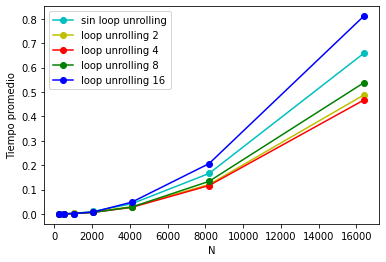

In [8]:
plt.plot(ns,lt,'-co',label='sin loop unrolling')
plt.plot(ns,ltlu2,'-yo',label='loop unrolling 2')
plt.plot(ns,ltlu4,'-ro',label='loop unrolling 4')
plt.plot(ns,ltlu8,'-go',label='loop unrolling 8')
plt.plot(ns,ltlu16,'-bo',label='loop unrolling 16')
plt.xlabel('N')
plt.ylabel('Tiempo promedio')
plt.legend()

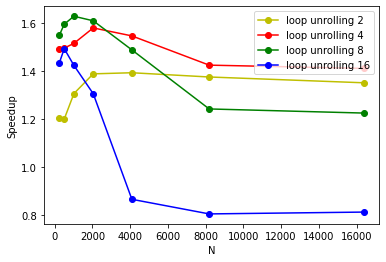

In [9]:
plt.plot(ns,asarray(lt)/asarray(ltlu2),'-yo',label='loop unrolling 2')
plt.plot(ns,asarray(lt)/asarray(ltlu4),'-ro',label='loop unrolling 4')
plt.plot(ns,asarray(lt)/asarray(ltlu8),'-go',label='loop unrolling 8')
plt.plot(ns,asarray(lt)/asarray(ltlu16),'-bo',label='loop unrolling 16')
plt.xlabel('N')
plt.ylabel('Speedup')
plt.legend()

Loop unrolling to the win! 💪. Desenroscar los bucles en cuatro elementos para la mejor opción 😓, pero en grupos de a dos no está nada mal.